In [1]:
# program for finding bound state energies#
import numpy as np
import matplotlib.pyplot as plt
# define parameters
Listwavelength = [744,724,692,664]
# width in meters
q=1.6*10**(-19) 
# electron charge
v0=0.22
# potential well height, in Joule
Esteps=1000 
# number of steps in energy vector
#E=np.linspace(0,V0,Esteps) 
# energy vector
m0=9.1*10**(-31) 
# free electron mass
me=0.13*m0 # effective electron mass
mh=0.45*m0 # effective hole mass
hbar=1.05*10**(-34) # plancks constant
minidelta = []
for i in Listwavelength:
    print("For the {} nm peak,".format(i), energy(i)/(1.6*10**(-19)) - 1.52, "eV")
    
print("Green energy:", energy(545)/(1.6*10**(-19)), "eV")
print("Orange energy:", energy(605)/(1.6*10**(-19)), "eV")
for i in Listwavelength:
    minidelta.append(energy(i) - 1.52*1.6*10**(-19))
    print("For the {} nm peak,".format(i), energy(i)/(1.6*10**(-19)) - 1.52, "eV")
    

g = energy(545)
o = energy(605)
Eg = 1.74*q
def energy(wavelength):
    la=wavelength*10**(-9)
    return 	299792458/la*2*np.pi*hbar
def a(w):
    return np.sqrt(3*hbar**2*np.pi**2/2*(1/me + 1/mh)*1/(energy(w) - Eg))

def b(w):
    return a(w)*np.sqrt(2.2/3)

print(a(550))
print(b(605))


me=0.067*m0 # effective electron mass
mh=0.48*m0 # effective hole mass

def Energye(E):
    return np.tan(L/2*np.sqrt(2*me/hbar**2*E)) - np.sqrt((V0-E)/E)

def Energyh(E):
    return np.tan(L/2*np.sqrt(2*mh/hbar**2*E)) - np.sqrt((V0-E)/E)
Erang = np.linspace(0.01*q, v0*q, 1000)
def length(Lam):
    Elam = energy(Lam)
    Llist = [i/2*10**(-9) for i in range(1,20)]
    for i in Llist:
        L = i
        for j in Erang:
            if abs(Energye(j))<10**(-3):
                break 
        for k in Erang:
            if abs(Energyh(j))<10**(-3):
                break 
        if abs(Elam/q-1.52-j/q-k/q)<10**(-2):
            break
        else:
            pass
    return i, j, k
L=9.5*10**(-9)
plt.plot(Erang, Energye(Erang))
plt.plot(Erang, Energyh(Erang))
"""
Skip this cell, done the code below.
"""

NameError: ignored

In [2]:
import numpy as np
import matplotlib.pyplot as plt
L = 9 * 10 **(-9) #Guess of a length
ECharge = 1.6 * 10 ** (-19) #Electron charge
V0 = 0.22 * ECharge #Potential
Esteps = 1000
E = np.linspace(0, V0, Esteps)
m0=9.1*10**(-31) # free electron mass
me=0.067*m0 # effective electron mass
mh=0.48*m0 # effective hole mass
hbar=1.05*10**(-34) # plancks constant
np.seterr(divide='ignore') #Doing so that linspace(0) is ignored, because we're going to devide
RHS = np.sqrt((V0-E)/E)
LHSe=np.tan(L/2*np.sqrt(2*me/hbar**2*E))
LHSh=np.tan(L/2*np.sqrt(2*mh/hbar**2*E))

Listwavelength = [744,724,692,664]
FixedEnergy = []
def energy(wavelength):
    la=wavelength*10**(-9)
    return 	299792458/la*2*np.pi*hbar
for element in Listwavelength:
    FixedEnergy.append(energy(element) - 1.52*1.6*10**(-19))
    print(f"For the wavelength {element}, the energy is {energy(element)/(1.6*10**(-19)) - 1.52} eV")


For the wavelength 744, the energy is 0.14148701753553028 eV
For the wavelength 724, the energy is 0.18738444895916406 eV
For the wavelength 692, the energy is 0.2663386431306862 eV
For the wavelength 664, the energy is 0.34166617627475104 eV


In [3]:
def Main():
    Arbval=[0.5e-9,1e-9,1.5e-9,2e-9,2.5e-9,3e-9,3.5e-9,4e-9,5e-9,6e-9,7e-9] # Some arbitrary values just for reference
    Peaks = Listwavelength.copy()
    error=10**(-2)#Treshold boundry
    for i in range(len(Arbval)):#Just 
        RHS=np.sqrt((V0-E)/E)
        LHSe=np.tan(Arbval[i]/2*np.sqrt(2*me/hbar**2*E))
        LHSh=np.tan(Arbval[i]/2*np.sqrt(2*mh/hbar**2*E))
        intersection1=[]
        intersection2=[]
        for j in range(1000):
            if abs(RHS[j]-LHSe[j])<error:#We're just looking at the intersection
                intersection1.append(RHS[j])
            if abs(RHS[j]-LHSh[j])<error: #We're just looking at the intersection
                intersection2.append(RHS[j])
        num1 = list(RHS).index(intersection1[0])#Finding a specific element in RHS
        num2 = list(RHS).index(intersection2[0])#Finding a specific element in RHS
        A = E[num1]/ECharge
        B = E[num2]/ECharge
        TotalEnergy = (A+B)*ECharge
        print(f"The energy at the wavelength {Arbval[i]} is {TotalEnergy}")
        lambdy=6.626e-34*2.99e8/(TotalEnergy+1.52*ECharge)#A Trehshold thing, seen in compendium
        for k in range(len(Peaks)):
           if abs(Peaks[k]-lambdy)< (10**(-30)):
              print(f"The peak {Peaks[k]} where the difference is {Peaks[k]-lambdy}") #Thus it's a peak at that wavelength



NameError: ignored

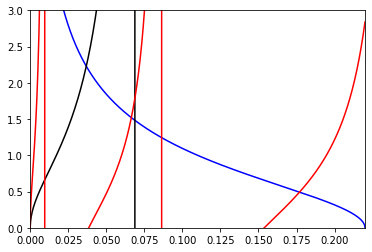

In [4]:
plt.plot(E/ECharge,RHS,'blue') 
plt.plot(E/ECharge,LHSe,'black')
plt.plot(E/ECharge,LHSh,'red')
plt.ylim([0,3])  # set y-axis range
plt.xlim([0,0.22]) # set x-axis range
plt.show()